## 作業

In [2]:
import pandas as pd
data = pd.read_csv('HW17__Data.csv')
print(data.head())
for v in data.columns:
    if v != '行業別':
        print(f'{v}平均值為:{data[v].mean():.2f}')
    else:
        print(f'行業筆數:{data[v].count():.0f}')

         行業別  經常性薪資  專業人員-經常性薪資  技術員及助理專業人員-經常性薪資  事務支援人員-經常性薪資  \
0   工業及服務業部門  27055       34003             28646         26068   
1       工業部門  26860       33788             28103         25906   
2   礦業及土石採取業  26170       35768             27744         23441   
3   石油及天然氣礦業  27696       37125             25313         23625   
4  砂_石及黏土採取業  25661       30000             29185         23405   

   服務及銷售工作人員-經常性薪資  技藝_機械設備操作及組裝人員-經常性薪資  基層技術工及勞力工-經常性薪資  
0            25012                 25338            22824  
1            25811                 24919            22784  
2            23625                 26988            22440  
3            23625                 23625                0  
4                0                 27629            22440  
行業筆數:111
經常性薪資平均值為:27764.80
專業人員-經常性薪資平均值為:33162.01
技術員及助理專業人員-經常性薪資平均值為:28917.55
事務支援人員-經常性薪資平均值為:26588.43
服務及銷售工作人員-經常性薪資平均值為:22083.83
技藝_機械設備操作及組裝人員-經常性薪資平均值為:23405.24
基層技術工及勞力工-經常性薪資平均值為:19570.29


### axis=1 求值

In [3]:
import pandas as pd

empl_df = pd.DataFrame({  
    'A': [30, 33, 35, 30, 30, 31],
    'B': [75, 75, 80, 70, 73, 70],
    'C': [80, 90, 75, 83, 97, 66],
    'D': [57, 83, 72, 96, 88, 25]
},index=["Ken","Vivin","Lindy","Iris","Gigi","Lucy"])
print("The Employee DataFrame is:")
print(empl_df,"\n")
mapping_dict = {'A':'Python', 'B':'Python', 'C':'Java', 'D':'C++'}
print("The DataFrame with mean values of each row is:")
print(empl_df.groupby(mapping_dict,axis=1).mean())

The Employee DataFrame is:
        A   B   C   D
Ken    30  75  80  57
Vivin  33  75  90  83
Lindy  35  80  75  72
Iris   30  70  83  96
Gigi   30  73  97  88
Lucy   31  70  66  25 

The DataFrame with mean values of each row is:
        C++  Java  Python
Ken    57.0  80.0    52.5
Vivin  83.0  90.0    54.0
Lindy  72.0  75.0    57.5
Iris   96.0  83.0    50.0
Gigi   88.0  97.0    51.5
Lucy   25.0  66.0    50.5


### 以多層次(MultiIndex)的 Column 名稱進行分組

In [4]:
import pandas as pd
import numpy as np
a = pd.MultiIndex.from_arrays(
    [['Python', 'Java', 'Python', 'Java', 'Python'], ['A', 'A', 'B', 'C', 'B']],
    names=['language', 'index']) ##雙主鍵(MultiIndex)
df4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=a)
print(df4)
print("-----------------")
print(df4.groupby(level='language', axis=1).sum( )) #指定要群組的是language
print("-----------------")
print(df4.groupby(level='index', axis=1).sum( )) #指定要群組的是index

language Python Java Python Java Python
index         A    A      B    C      B
0             7    1      2    1      2
1             4    4      6    4      7
2             9    9      8    6      2
3             9    3      6    9      2
4             6    8      5    3      4
-----------------
language  Java  Python
0            2      11
1            8      17
2           15      19
3           12      17
4           11      15
-----------------
index   A   B  C
0       8   4  1
1       8  13  4
2      18  10  6
3      12   8  9
4      14   9  3


## 功能聚合與重新採樣
+ 我們可針對數值資料進行各種計算。
+ 聚合代表 .agg( ) 這個動作：
   + 可以整併各種計算為多個 column 輸出。
   + 分組後也可以利用可以進行各組的資料計算。
+ 我們可針對物件進行 resample( ) 動作進行重新採樣，藉此調整日期時間資料的出現頻率。
+ [time offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

### pandas028原型

In [5]:
import pandas as pd
df = pd.read_csv('salesv3.csv',encoding="utf-8")
df["date"] = pd.to_datetime(df['date'])
print(df.head( ))
print("-------------")

   account number                         name       sku  quantity  \
0          740150                   Barton LLC  B1-20000        39   
1          714466              Trantow-Barrows  S2-77896        -1   
2          218895                    Kulas Inc  B1-69924        23   
3          307599  Kassulke, Ondricka and Metz  S1-65481        41   
4          412290                Jerde-Hilpert  S2-34077         6   

   unit price  ext price                date  
0       86.69    3380.91 2014-01-01 07:21:51  
1       63.16     -63.16 2014-01-01 10:00:47  
2       90.70    2086.10 2014-01-01 13:24:58  
3       21.05     863.05 2014-01-01 15:05:22  
4       83.21     499.26 2014-01-01 23:26:55  
-------------


In [6]:
import pandas028
test = (pandas028.df['date'] >= '2014-01-01') & (pandas028.df['date'] <= '2014-01-31') & (pandas028.df['name'] =='Barton LLC')
print("first:",pandas028.df[test][['name','ext price','date']])
print("sum:",pandas028.df[test]['ext price'].sum())
print("-------------")
a=pandas028.df.set_index('date').resample('M')["ext price"].sum( ) #日期重新採樣 使用(M)月結點
print(a)
print("-------------")
b=pandas028.df.set_index('date').groupby('name')["ext price"].resample("M").sum()
print(b)
c=pandas028.df.set_index('date').groupby('name')["ext price"].resample("A-DEC").sum()#表示12月作為結束的一整年
print(c)

first:            name  ext price                date
0    Barton LLC    3380.91 2014-01-01 07:21:51
85   Barton LLC     156.80 2014-01-20 01:48:47
91   Barton LLC      68.06 2014-01-20 13:27:52
96   Barton LLC     181.82 2014-01-21 21:21:01
99   Barton LLC     608.20 2014-01-22 16:33:51
105  Barton LLC     658.70 2014-01-24 00:00:35
117  Barton LLC     975.24 2014-01-27 05:48:37
125  Barton LLC     147.84 2014-01-28 16:28:29
sum: 6177.57
-------------
date
2014-01-31    185361.66
2014-02-28    146211.62
2014-03-31    203921.38
2014-04-30    174574.11
2014-05-31    165418.55
2014-06-30    174089.33
2014-07-31    191662.11
2014-08-31    153778.59
2014-09-30    168443.17
2014-10-31    171495.32
2014-11-30    119961.22
2014-12-31    163867.26
Freq: M, Name: ext price, dtype: float64
-------------
name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.

In [7]:
import pandas028
import datetime
a=pandas028.df.groupby(['name', pandas028.pd.Grouper(key='date', freq='M')])['ext price'].sum( ) ## 每個月底
print("-------------")
print(a)
print("-------------")
b=pandas028.df.groupby(['name', pandas028.pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum( )#A-DEC 採樣頻率為12月底
print(b)

-------------
name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.17
                            ...   
Will LLC    2014-08-31     1439.82
            2014-09-30     4345.99
            2014-10-31     7085.33
            2014-11-30     3210.44
            2014-12-31    12561.21
Name: ext price, Length: 240, dtype: float64
-------------
name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     82865.00
Jerde-Hilpert                    2014-12-31    112591.43
Kassulke, Ondricka and Metz      2014-12-31     86451.07
Keeling LLC        

### 功能聚合

In [8]:
import pandas028
a=pandas028.df[["ext price", "quantity"]].sum( )
b=pandas028.df["unit price"].mean( )
print(a)
print("-----------")
print(b)
print("-----------")
c=pandas028.df[["ext price", "quantity", "unit price"]].agg(['sum', 'mean']) # 希望同時計算 sum 與 mean
print(c)
print("-----------")

ext price    2018784.32
quantity       36463.00
dtype: float64
-----------
55.00752666666659
-----------
         ext price      quantity    unit price
sum   2.018784e+06  36463.000000  82511.290000
mean  1.345856e+03     24.308667     55.007527
-----------


### value_counts 統計出現次數

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'X': [1, 2, 3, np.nan, 3],
                   'Y': [4, np.nan, 8, np.nan, 3]})
print("DataFrame:")
print(df)
absolute_counts=df["X"].value_counts()
absolute_counts_nan=df["X"].value_counts(dropna=False)#表示顯示nan的出現次數 預設為True不顯示nan
print("Frequencies of elements of X column:")
print(absolute_counts)
print(absolute_counts_nan)
print(absolute_counts.index[0]) # 取得出現頻率最高的

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Frequencies of elements of X column:
3.0    2
1.0    1
2.0    1
Name: X, dtype: int64
3.0    2
1.0    1
2.0    1
NaN    1
Name: X, dtype: int64
3.0


In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'X': [1, 2, 3, np.nan, 3],
                   'Y': [4, np.nan, 8, np.nan, 3]})
print("DataFrame:")
print(df)
print("====================")
absolute_counts=df.value_counts(dropna=False)
print(absolute_counts)

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
X    Y  
1.0  4.0    1
2.0  NaN    1
3.0  3.0    1
     8.0    1
NaN  NaN    1
dtype: int64


In [17]:
import pandas028
## 分別設定不同欄位做甚麼
a=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})
get_max = lambda x: x.value_counts(dropna=False).index[0]
b=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(a)
print("-----------")
print(b)
print("-----------")
get_max.__name__ = "most frequent" #設定名稱為most frequent
c=pandas028.df.agg({'ext price': ['sum', 'mean',get_max], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(c)
print("-----------")

         ext price      quantity  unit price
sum   2.018784e+06  36463.000000         NaN
mean  1.345856e+03     24.308667   55.007527
-----------
             ext price      quantity  unit price       sku
sum       2.018784e+06  36463.000000         NaN       NaN
mean      1.345856e+03     24.308667   55.007527       NaN
<lambda>           NaN           NaN         NaN  S2-77896
-----------
                  ext price      quantity  unit price       sku
sum            2.018784e+06  36463.000000         NaN       NaN
mean           1.345856e+03     24.308667   55.007527       NaN
most frequent  1.484000e+03           NaN         NaN  S2-77896
-----------


### Q1

In [21]:
import pandas027
import numpy as np
print(pandas027.df)
grouped = pandas027.df.groupby('Team')
print(type(grouped))
print("===========================")
print(grouped.first())
print("==========Size=================")
print(grouped.agg("size"))#注意有小寫kings
print("==========NP Size=================")
print(grouped.agg(np.size))#每個欄位都填上相對應的size
print("==========lambda NP Size=================")
print(grouped.agg(lambda x:np.size(x)))


      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
==========Size=================
Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
dtype: int64
==========NP Size=================
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1
==========lambda NP

In [22]:
import pandas027
import numpy as np
grouped = pandas027.df.groupby('Team')
print(grouped.first())
print(grouped['Points'].agg([np.sum, np.mean, np.std]))

        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
         sum        mean         std
Team                                
Devils  1536  768.000000  134.350288
Kings   2285  761.666667   24.006943
Riders  3049  762.250000   88.567771
Royals  1505  752.500000   72.831998
kings    812  812.000000         NaN


# 資料合併

## 資料合併 
+ merge( ) 方法可作為 DataFrame 對象之間的連結方式。
 + 裡面必須加入的參數為兩個 DataFrame 對象。
 + on 這個參數指的是用於連接的 Column 索引名稱。
   + 必須存在左右兩個 DataFrame 對象中，如果沒有指定且其他參數也未指定則以兩個 DataFrame 的列名交集做為連接鍵。
   + 如果指定的 Column 於兩個 DataFrame 上的名稱不同，則可以透過 left_on 與 right_on 兩個參數分別指定。
 + how( ) 這個參數是指左右兩個對象中存在不重合的鍵合併連接的方式：
   + inner：預設，代表交集 (內連接)。
   + outer：代表並集 (外連接)。
   + left：代表左外連接。
   + right：代表右外連接。
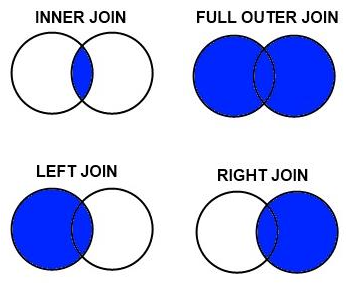   

### 資料合併的原始資料

In [23]:
import pandas as pd
left = pd.DataFrame({ 'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame({'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")

   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5
--------------------
   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5
--------------------


In [24]:
import pandas030
pd1=pandas030.pd
left1=pandas030.left
right1=pandas030.right
print("--------id------------")
print(pd1.merge(left1,right1,on='id')) #使用id做合併
print("----------'id','subject_id----------")
print(pd1.merge(left1,right1,on=['id','subject_id'])) #id一樣的 且 subject_id也一樣的做合併
print("---------left-----------")
print(pd1.merge(left1,right1, on='subject_id', how='left')) #以left資料為主 sub1在right 資料缺少所以Nan
print("-----------right---------")
print(pd1.merge(left1,right1, on='subject_id', how='right')) #以Right資料為主 sub3在left 資料缺少所以Nan
print("---------outer-----------")
print(pd1.merge(left1,right1, how='outer', on='subject_id')) # Right or left有的都可以
print("---------inner-----------")
print(pd1.merge(left1,right1, on='subject_id', how='inner'))# Right and left 的subject_id 必須一樣
print("--------------------")
print(pd1.merge(left1,right1,on=['subject_id'])) 

--------id------------
   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5
----------'id','subject_id----------
   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty
---------left-----------
   id_x  Name_x subject_id  id_y Name_y
0     1    Alex       sub1   NaN    NaN
1     2     Amy       sub2   1.0  Billy
2     3   Allen       sub4   2.0  Brian
3     4   Alice       sub6   4.0  Bryce
4     5  Ayoung       sub5   5.0  Betty
-----------right---------
   id_x  Name_x subject_id  id_y Name_y
0   2.0     Amy       sub2     1  Billy
1   3.0   Allen       sub4     2  Brian
2   NaN     NaN       sub3     3   Bran
3   4.0   Alice       sub6     4  Bryce
4   5.0  Ayoung       sub5     5  Betty
---------outer-----------
   id

## 資料合併的欄位名稱不同

In [25]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject1':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject2':['sub2','sub4','sub3','sub6','sub5']})
print(left)
print("--------------------")
print(right)
print("--------------------")
print(pd.merge(left,right,left_on="subject1",right_on="subject2" , how='left')) #因為名稱不一樣 需特別指定left_on 與 right_on
# 因為指定left所以left全都顯示 right只顯示與left共有的一部分 如無資料顯示NaN
print("--------------------")

   id    Name subject1
0   1    Alex     sub1
1   2     Amy     sub2
2   3   Allen     sub4
3   4   Alice     sub6
4   5  Ayoung     sub5
--------------------
   id   Name subject2
0   1  Billy     sub2
1   2  Brian     sub4
2   3   Bran     sub3
3   4  Bryce     sub6
4   5  Betty     sub5
--------------------
   id_x  Name_x subject1  id_y Name_y subject2
0     1    Alex     sub1   NaN    NaN      NaN
1     2     Amy     sub2   1.0  Billy     sub2
2     3   Allen     sub4   2.0  Brian     sub4
3     4   Alice     sub6   4.0  Bryce     sub6
4     5  Ayoung     sub5   5.0  Betty     sub5
--------------------


# 資料連結

+ Pandas 的 concat 方法可以做到兩個資料的 Rows (預設) 的連結。
+ 預設參數：
  + 連結的 Series 或 DataFrame 物件。
  + axis：預設為 0，這是要連接的軸。
  + join：預設為 outer，亦可選擇 inner。
  + ignore_index：預設為 False。如果為 True，請不要在連接軸上使用索引值。


## 資料連結的原始資料

In [26]:
import pandas as pd
one = pd.DataFrame({ 'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5'],
         'Marks_scored':[98,90,87,69,78]},
         index=[1,2,3,4,5])
two = pd.DataFrame({  'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5'],
         'Marks_scored':[89,80,79,97,88]},
         index=[1,2,3,4,5])
print(one)
print("--------------------")
print(two)
print("--------------------")

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
--------------------
    Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88
--------------------


In [27]:
import pandas031
pd1=pandas031.pd
one1=pandas031.one
two1=pandas031.two
pd2=pd1.concat([one1,two1])## axis=0
print(pd2)
print("--------------------")
pd3=pd1.concat([one1,two1],keys=['one-x','two-y'])##建立階層式索引 最外層的Key
print(pd3)
print("--------------------")
pd4=pd1.concat([one1,two1],ignore_index=True) #不使用之前的index
print(pd4)
print("--------------------")
pd5=pd1.concat([one1,two1],axis=1)
print(pd5)
print("--------------------")

     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
--------------------
    Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88
--------------------
     Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
1   Billy       sub2            89
2   Brian       sub4            80
3    Bran       sub3            79
4   Bryce       sub6            97
5   Betty       sub5            88
--------------------
           Name subject_id  Marks_scored
one-x 1    Alex       sub1            98
      2     Amy       sub2            90
      3   Allen

# 轉換與過濾
+ 轉換：
  + Group 或 column 可以透過 transform 函數進行轉換，返回索引的對象的大小與被分組的大小相同。
+ 過濾：
  + 依據 filter( ) 函數進行篩選與過濾的動作並傳回資料。

In [28]:
import pandas as pd
pl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders','LuLu'],
         'Rank': [1, 2, 2, 3, 3,4 ,1,1,2,4,1,2,4],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017,2018],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690,700]}
df = pd.DataFrame(pl_data)
print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
12    LuLu     4  2018     700


## 選組與聚合

In [30]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Year')
print (grouped.get_group(2017))
print ("=================================")
grouped = df1.df.groupby('Year')
print(grouped['Points'].agg(np.mean))
print(grouped['Points'].agg("mean"))
print ("=================================")
grouped2 = df1.df.groupby('Team')
print(grouped2.agg(np.size))
print ("=================================")
print(grouped2['Points'].agg([np.sum, np.mean, np.std]))

      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
Year
2014    795.25
2015    769.50
2016    725.00
2017    739.00
Name: Points, dtype: float64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      4     4       4
Riders     4     4       4
Royals     2     2       2
         sum    mean         std
Team                            
Devils  1536  768.00  134.350288
Kings   3097  774.25   31.899582
Riders  3049  762.25   88.567771
Royals  1505  752.50   72.831998


## 轉換與過濾

In [31]:
import pandas_group as df1
import numpy as np
grouped = df1.df.groupby('Team')
print (df1.df)
print ("==================")
print (grouped.first())#取得每個群組的第一個值
print ("==================")
score = lambda x: x*10
print (grouped.transform(score))
print ("==================")
print (df1.df.groupby('Team').filter(lambda x: len(x) >= 3))

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    Kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
    Rank   Year  Points
0     10  20140    8760
1     20  20150    7890
2     20  20140    8630
3     30  20150    6730
4     30  20140    7410
5     40  20150    8120
6     10  20160    7560
7     10  20170    7880
8     20  20160    6940
9     40  20140    7010
10    10  20150    8040
11    20  20170    6900
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
4    Kings     3  2014     741

# 進階圖表功能
+ pandas 內附簡易的 matplot 繪圖工具，可以讓您方便快速產生結果，但如果您的環境內已經執行 matplot，那 pandas 的圖表也必須透過 matplot 的物件執行 show 方式才能呈現。
+ 折線圖是最基本產生圖表的方式。

                   A         B         C         D
2018-01-01  0.199160 -0.340503 -0.231160 -0.559208
2018-01-02  0.141830  0.625774 -1.028035 -0.563296
2018-01-03  2.073902 -1.624532 -0.126583 -0.073731
2018-01-04  0.608130  0.316805 -0.810933  0.414526
2018-01-05  0.976499 -0.320096 -1.611460 -0.151214
2018-01-06  0.842305 -0.105480  0.991879  1.684195
2018-01-07 -0.235166 -0.175027 -0.134214  1.462822
2018-01-08 -0.350346 -2.427321  0.031862  1.459146
2018-01-09  1.239371  1.159854 -0.082311  0.294569
2018-01-10  0.943170  0.907757  0.254163 -0.183859


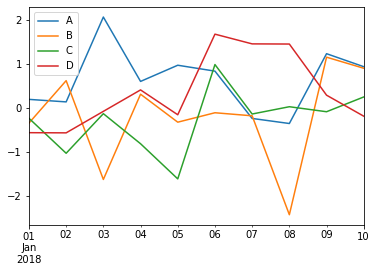

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## np.random.randn(10,4) 10x4 ndarray 內容為亂數
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2018',periods=10), columns=list('ABCD'))
print(df)
df.plot( )
plt.show( )

## 進階圖表-兩條曲線

           population       area
London        8615246  1572000.0
Berlin        3562166   891850.0
Madrid        3165235   605770.0
Rome          2874038  1285000.0
Paris         2273305   105400.0
Vienna        1805681   414600.0
Bucharest     1803425   228000.0
Hamburg       1760433   755000.0
Budapest      1754000   525200.0
Warsaw        1740119   517000.0
Barcelona     1602386   101900.0
Munich        1493900   310400.0
Milan         1350680   181800.0


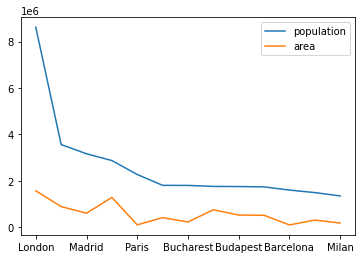

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
cities = {"name": ["London", "Berlin", "Madrid", "Rome",
                   "Paris", "Vienna", "Bucharest", "Hamburg",
                   "Budapest", "Warsaw", "Barcelona","Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,1350680],
          "area" : [1572, 891.85, 605.77, 1285,
                    105.4, 414.6, 228, 755, 525.2, 517, 101.9, 310.4,181.8]
}
city_frame = pd.DataFrame(cities, columns=["population", "area"],index=cities["name"])
city_frame["area"] *= 1000
print(city_frame)
city_frame.plot( )
plt.show()

# 子圖表 (1)
+ 一個 Figure 對象可以包含多個子圖 (Axes)，預設三個參數：
  + num_rows：幾個 rows。
  + num_cols：幾個 columns。
  + plot_num：代表第幾張圖表。
+ 然後按照從左到右，從上到下的順序對每個子區域進行編號，左上的子區域的編號為 1。
+ Plot_num 參數指定創建的 Axes 對象所在的區域。
+ 如果 numRows ＝ 2、numCols ＝ 3，那整個繪製圖表樣式為 2×3 的圖片區域,用坐標表示為
  + (1, 1), (1, 2), (1, 3)
  + (2, 1), (2, 2), (2, 3)
+ 當 plotNum ＝ 3 時,表示的坐標為 (1, 3)，即第一 row 第三 column 的子圖。
+ 如果 numRows、numCols 和 plotNum 這三個數都小於 10 的話，可以把它們縮寫為一個整數，例如 subplot(232) 和 subplot(2,3,2) 是相同的。
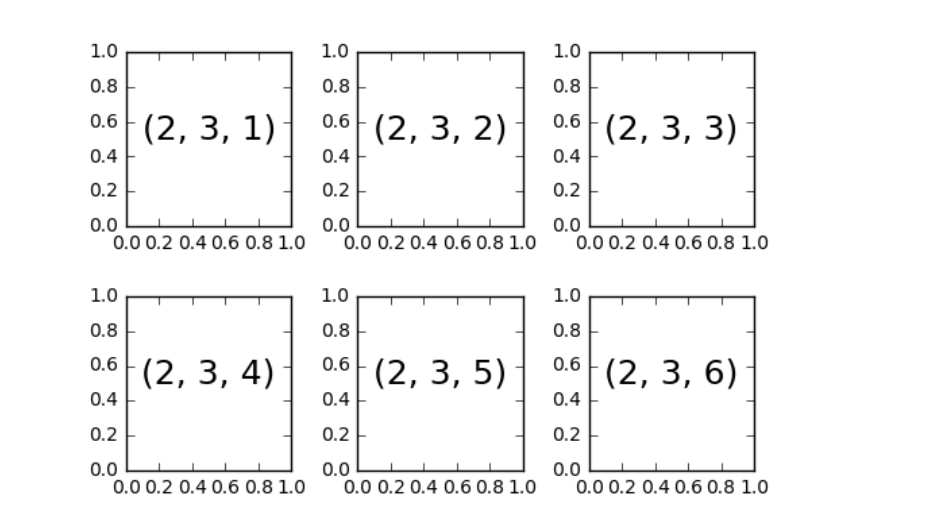

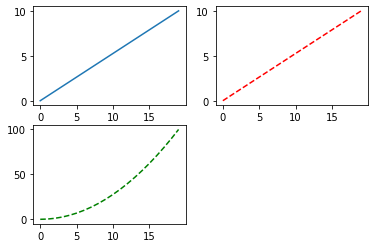

In [34]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
# 左往右數第幾張
plt.subplot(2, 2, 1) #產生2 x 2的圖表 第1張
plt.plot(t, s)
plt.subplot(2, 2, 2)#產生2 x 2的圖表 第2張
plt.plot(t, s, 'r--')
plt.subplot(223)#產生2 x 1的圖表 第3張
plt.plot(t, s**2, 'g--')
plt.show()

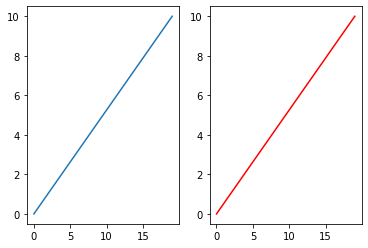

In [35]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 20.0, 1)
s = np.linspace(0, 10, 20)
plt.subplot(1, 2, 1)#一共2張 其中的第一張
plt.plot(t, s)
plt.subplot(1, 2, 2)#一共2張 其中的第二張
plt.plot(t, s, 'r-')
plt.show()

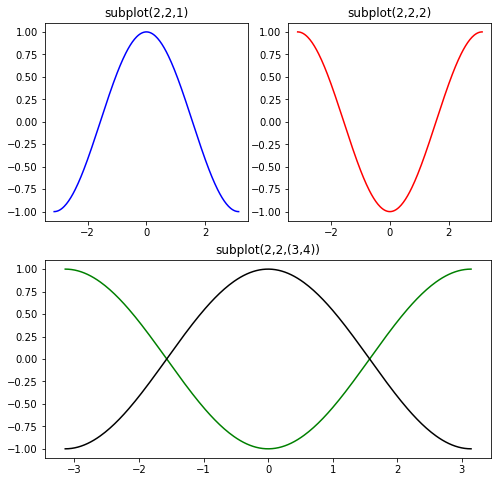

In [36]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256)# 負pi 到正pi 間格取256
Y = np.cos(X)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(X, Y, color="blue")
plt.title('subplot(2,2,1)')
plt.subplot(2,2,2)
plt.plot(X, Y*-1, color="red")
plt.title('subplot(2,2,2)')
plt.subplot(2,2,(3,4))
plt.plot(X, Y*-1, color="green")
plt.plot(X, Y, color="black")
plt.title('subplot(2,2,(3,4))')
plt.show( )

# 分析與圖表顯示 1- 查看數值與型態
+ 讀取 salesv2.csv，並請將日期資料視為字串，方便之後的重新取樣。
+ 我們可以做一些快速分析，可再查看單價 (unit price)，可知道平均值與最大最小值。
+ 接著透過 dtypes 的輸出確保數字資料的格式是浮點數或整數。
+ describe 可快速查看count mean std min 等綜合資訊

In [37]:
import pandas as pd
sales=pd.read_csv("salesv2.csv",parse_dates=['date'])# 將date轉換成日期格式
print(sales.head( ))
print("----------1-----------")
print(sales.describe( ))
print("----------2-----------")
print(sales['unit price'].describe( ))
print("----------3-----------")
print(sales.dtypes)
print("----------4-----------")

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.

## 分析與圖表顯示 2- 分組與 Bar 顯示
+ 首先我們只取出 name、 ext price 與 date 三個欄位分析。
+ 為了理解購買模式，我們依據名稱 (name) 對所有客戶進行分組，再接著查看每個客戶的消費次數情況。
+　資料再以 Bar 方式顯示!

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
----------2-----------
----------3-----------
----------4-----------
                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1          

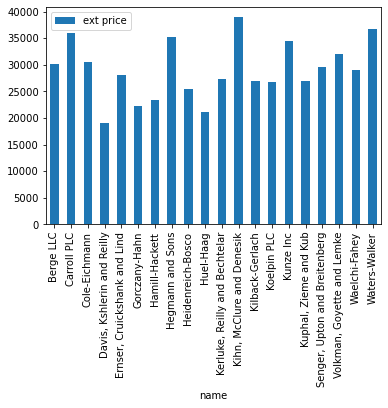

In [38]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head( ))
print("----------5-----------")
customer_group = customers.groupby('name')
print(customer_group.size( ))
print("----------6-----------")
sales_totals = customer_group.sum( )
print(sales_totals)
my_plot = sales_totals.plot(kind='bar')
plt.show()